# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Question 1

In [332]:
df = pd.read_csv('../data/Heart.csv', index_col=False)
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


#### Setup

Using heart dataset. Independent variable is age. Dependent variable is resting blood pressure

In [333]:
x = df["Age"]
y = df["RestBP"]

In [334]:
x = x.values.reshape(-1, 1)

#### Standard Linear Regression

In [335]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
model.coef_, model.intercept_

(array([0.55483611]), 101.48507719035973)

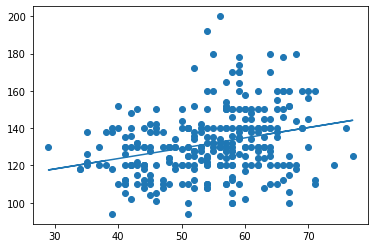

In [337]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

#### Split data into training and test

In [338]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

#### Create model using training dataset

In [339]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([0.51670708]), 103.78281377812733)

#### Plot results of training dataset

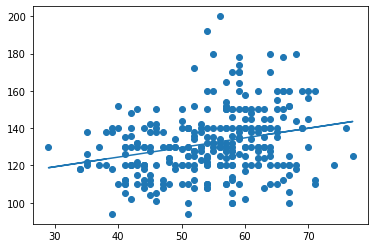

In [340]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

#### MSE for train model

In [341]:
mse_train = sk.metrics.mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)
mse_train

301.3292778436032

#### MAE for Train Model

In [342]:
mae_train = sk.metrics.mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)
mae_train

13.248257928167703

#### Plot model on test data

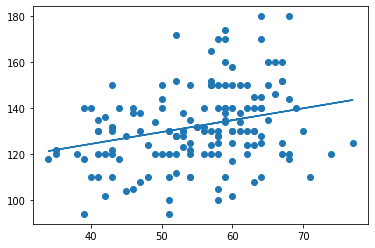

In [343]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

#### MSE for test model

In [344]:
mse_test = sk.metrics.mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)
mse_test

266.44492242952026

#### MAE for Test Model

In [345]:
mae_test = sk.metrics.mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)
mae_test

12.757752306428742

#### All Metrics

In [346]:
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)


Train MSE:  301.3292778436032
Train MAE:  13.248257928167703
Test MSE:  266.44492242952026
Test MAE:  12.757752306428742


### Question 2

Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate: 
+ Accuracy
+ Confusion Matrix
+ Classifcation Report

#### Read in credit dataset

In [347]:
df = pd.read_csv("../data/Credit.csv")

#### Change rating to logical. 1 for score 450 and over, 0 if not.

In [348]:
df[["Rating"]] = df[["Rating"]] >= 450
df[["Rating"]] = df[["Rating"]].astype(int)

#### Identify columns for removal and remove
Removes all non-numeric variables and income, limit and balance

In [349]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [350]:
to_remove = ['Unnamed: 0','Gender', 'Student', 'Married', 'Ethnicity', 'Income', 'Limit', 'Balance']

In [351]:
x = df.copy().drop(to_remove, axis=1)

In [352]:
x.columns

Index(['Rating', 'Cards', 'Age', 'Education'], dtype='object')

#### Split dataset

In [353]:
x_train, x_test = train_test_split(x, test_size=.5)

#### Import decision tree function and run model

In [354]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [355]:
model.fit(x_train.drop(["Rating"], axis = 1), x_train.Rating)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Display Feature Importances

In [356]:
list(zip(x_train.drop(["Rating"], axis = 1).columns, model.feature_importances_))

[('Cards', 0.16188971420669485),
 ('Age', 0.5268664133975369),
 ('Education', 0.3112438723957682)]

#### Import Decision Tree Metrics, create predictions

In [357]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [358]:
predictions_train = model.predict(x_train.drop(["Rating"], axis=1))
predictions_test = model.predict(x_test.drop(["Rating"], axis=1))

#### Training model metrics
*Accuracy Score*

In [359]:
accuracy_score(x_train.Rating, predictions_train)

0.985

*Confusion Matrix*

In [360]:
sk.metrics.confusion_matrix(x_train.Rating, predictions_train)

array([[159,   0],
       [  3,  38]], dtype=int64)

*Classification Report*

In [361]:
print(classification_report(x_train.Rating, predictions_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.93      0.96        41

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.98       200
weighted avg       0.99      0.98      0.98       200



#### Testing Model Metrics
*Accuracy Score*

In [362]:
accuracy_score(x_test.Rating, predictions_test)

0.68

*Confusion Matrix*

In [363]:
sk.metrics.confusion_matrix(x_test.Rating, predictions_test)

array([[124,  25],
       [ 39,  12]], dtype=int64)

*Classification Report*

In [364]:
print(classification_report(x_test.Rating, predictions_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       149
           1       0.32      0.24      0.27        51

    accuracy                           0.68       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.65      0.68      0.66       200



### Question 3

(Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In this model I will add back in the *student* and *married* variables, as booleans.

#### Identify columns for removal and remove

In [365]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [366]:
to_remove = ['Unnamed: 0','Gender', "Ethnicity", 'Income', 'Limit', 'Balance']

In [367]:
x = df.copy().drop(to_remove, axis=1)

In [368]:
x.Student = x.Student == "Yes"
x.Student = x.Student.astype(int)
x.Married = x.Married == "Yes"
x.Married = x.Married.astype(int)

In [369]:
x

,Rating,Cards,Age,Education,Student,Married
0,0,2,34,11,0,1
1,1,3,82,15,1,1
2,1,4,71,11,0,0
3,1,3,36,11,0,0
4,0,2,68,16,0,1
...,...,...,...,...,...,...
395,0,3,32,13,0,1
396,0,5,65,17,0,0
397,0,5,67,12,0,1
398,0,1,44,13,0,1


#### Split dataset

In [370]:
x_train, x_test = train_test_split(x, test_size=.5)

#### Import decision tree function and run model

In [371]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [372]:
model.fit(x_train.drop(["Rating"], axis = 1), x_train.Rating)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Display Feature Importances

In [373]:
list(zip(x_train.drop(["Rating"], axis = 1).columns, model.feature_importances_))

[('Cards', 0.21563315800674238),
 ('Age', 0.4329700864408472),
 ('Education', 0.27003836300458783),
 ('Student', 0.0171482385576833),
 ('Married', 0.06421015399013921)]

#### Import Decision Tree Metrics, create predictions

In [374]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [375]:
predictions_train = model.predict(x_train.drop(["Rating"], axis=1))
predictions_test = model.predict(x_test.drop(["Rating"], axis=1))

#### Training model metrics
*Accuracy Score*

In [376]:
accuracy_score(x_train.Rating, predictions_train)

1.0

*Confusion Matrix*

In [377]:
sk.metrics.confusion_matrix(x_train.Rating, predictions_train)

array([[151,   0],
       [  0,  49]], dtype=int64)

*Classification Report*

In [378]:
print(classification_report(x_train.Rating, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### Testing Model Metrics
*Accuracy Score*

In [379]:
accuracy_score(x_test.Rating, predictions_test)

0.685

*Confusion Matrix*

In [380]:
sk.metrics.confusion_matrix(x_test.Rating, predictions_test)

array([[129,  28],
       [ 35,   8]], dtype=int64)

*Classification Report*

In [381]:
print(classification_report(x_test.Rating, predictions_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       157
           1       0.22      0.19      0.20        43

    accuracy                           0.69       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.67      0.69      0.67       200



#### Conclusion

Adding *student* and *married* back into the model increased accuracy by about 5%. Precision and recall also improved.